#### Project: Data Modeling with Postgres

__Introduction__

A startup called Sparkify wants to analyze the data they've been collecting on songs and user activity on their new music streaming app. The analytics team is particularly interested in understanding what songs users are listening to. Currently, they don't have an easy way to query their data, which resides in a directory of JSON logs on user activity on the app, as well as a directory with JSON metadata on the songs in their app.

They'd like a data engineer to create a Postgres database with tables designed to optimize queries on song play analysis, and bring you on the project. Your role is to create a database schema and ETL pipeline for this analysis. You'll be able to test your database and ETL pipeline by running queries given to you by the analytics team from Sparkify and compare your results with their expected results.

__Project Description__

In this project, you'll apply what you've learned on data modeling with Postgres and build an ETL pipeline using Python. To complete the project, you will need to define fact and dimension tables for a star schema for a particular analytic focus, and write an ETL pipeline that transfers data from files in two local directories into these tables in Postgres using Python and SQL.


__Song Dataset__

The first dataset is a subset of real data from the <a href="http://millionsongdataset.com/">Million Song dataset</a>. Each file is in JSON format and contains metadata about a song and the artist of that song. The files are partitioned by the first three letters of each song's track ID. For example, here are filepaths to two files in this dataset.

`song_data/A/B/C/TRABCEI128F424C983.json
song_data/A/A/B/TRAABJL12903CDCF1A.json`

And below is an example of what a single song file, TRAABJL12903CDCF1A.json, looks like.

`{"num_songs": 1, "artist_id": "ARJIE2Y1187B994AB7", "artist_latitude": null, "artist_longitude": null, "artist_location": "", "artist_name": "Line Renaud", "song_id": "SOUPIRU12A6D4FA1E1", "title": "Der Kleine Dompfaff", "duration": 152.92036, "year": 0}`

__Log Dataset__

The second dataset consists of log files in JSON format generated by this <a href="https://github.com/Interana/eventsim">event simulator</a> based on the songs in the dataset above. These simulate activity logs from a music streaming app based on specified configurations.

The log files in the dataset you'll be working with are partitioned by year and month. For example, here are filepaths to two files in this dataset.

`log_data/2018/11/2018-11-12-events.json
log_data/2018/11/2018-11-13-events.json`

And below is an example of what the data in a log file, 2018-11-12-events.json, looks like.

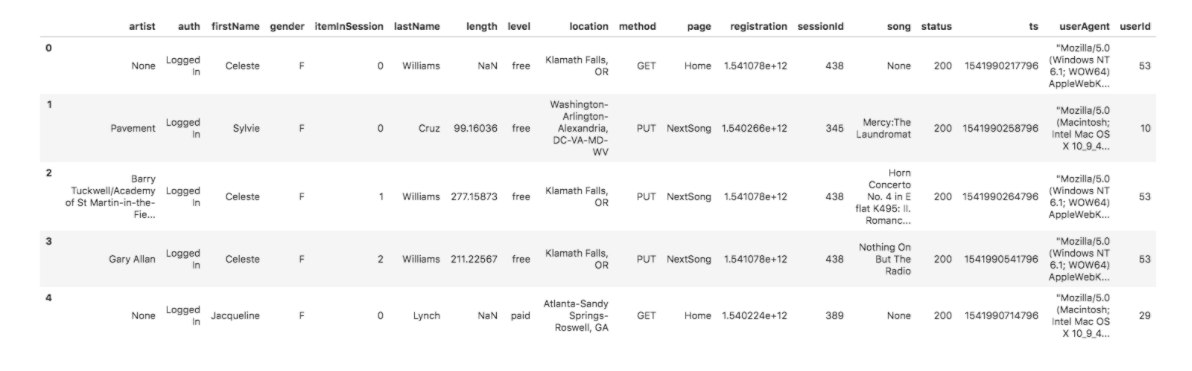

If you would like to look at the JSON data within log_data files, you will need to create a pandas dataframe to read the data. Remember to first import JSON and pandas libraries.

`df = pd.read_json(filepath, lines=True)`

For example, 

`df = pd.read_json('data/log_data/2018/11/2018-11-01-events.json', lines=True)` would read the data file 2018-11-01-events.json.

In case you need a refresher on JSON file formats, <a href="https://www.youtube.com/watch?v=hO2CayzZBoA&t=1s">here is a helpful video</a>

# Project instruction

#### Schema for Song Play Analysis
Using the song and log datasets, you'll need to create a star schema optimized for queries on song play analysis. This includes the following tables.

##### Fact Table
1. __songplays__ - records in log data associated with song plays i.e. records with page `NextSong`
    - `songplay_id, start_time, user_id, level, song_id, artist_id, session_id, location, user_agent`

##### Dimension Tables
2. users - users in the app
    - `user_id, first_name, last_name, gender, level`
3. songs - songs in music database
    - `song_id, title, artist_id, year, duration`
4. artists - artists in music database
    - `artist_id, name, location, latitude, longitude`
5. time - timestamps of records in __songplays__ broken down into specific units
    - `start_time, hour, day, week, month, year, weekday`
    
##### Project Template
To get started with the project, go to the workspace on the next page, where you'll find the project template files. You can work on your project and submit your work through this workspace. Alternatively, you can download the project template files from the Resources folder if you'd like to develop your project locally.

In addition to the data files, the project workspace includes six files:

1. `test.ipynb` displays the first few rows of each table to let you check your database.
2. `create_tables.py` drops and creates your tables. You run this file to reset your tables before each time you run your ETL scripts.
3. `etl.ipynb` reads and processes a single file from __song_data__ and __log_data__ and loads the data into your tables. This notebook contains detailed instructions on the ETL process for each of the tables.
4. `etl.py` reads and processes files from __song_data__ and __log_data__ and loads them into your tables. You can fill this out based on your work in the ETL notebook.
5. `sql_queries.py` contains all your sql queries, and is imported into the last three files above.
6. `README.md` provides discussion on your project.
    
##### Project Steps
Below are steps you can follow to complete the project:

##### Create Tables
1. Write `CREATE` statements in `sql_queries.py` to create each table.
2. Write `DROP` statements in `sql_queries.py` to drop each table if it exists.
3. Run `create_tables.py` to create your database and tables.
4. Run `test.ipynb` to confirm the creation of your tables with the correct columns. Make sure to click "Restart kernel" to close the connection to the database after running this notebook.
    
##### Build ETL Processes
Follow instructions in the `etl.ipynb` notebook to develop ETL processes for each table. At the end of each table section, or at the end of the notebook, run `test.ipynb` to confirm that records were successfully inserted into each table. Remember to rerun `create_tables.py` to reset your tables before each time you run this notebook.

##### Build ETL Pipeline
Use what you've completed in `etl.ipynb` to complete `etl.py`, where you'll process the entire datasets. Remember to run `create_tables.py` before running `etl.py` to reset your tables. Run `test.ipynb` to confirm your records were successfully inserted into each table.

##### Document Process
Do the following steps in your `README.md` file.
1. Discuss the purpose of this database in the context of the startup, Sparkify, and their analytical goals.
2. State and justify your database schema design and ETL pipeline.
3. [Optional] Provide example queries and results for song play analysis.
    
Here's a <a href="https://www.markdownguide.org/basic-syntax/">guide</a> on Markdown Syntax.

NOTE: You will not be able to run `test.ipynb`, `etl.ipynb`, or `etl.py` until you have run `create_tables.py` at least once to create the sparkifydb database, which these other files connect to.
    
##### Project Rubric
Read the project <a href="https://review.udacity.com/#!/rubrics/2500/view">rubric</a> before and during development of your project to ensure you meet all specifications.

;

In [3]:
import pandas as pd

- Explore log_data

In [9]:
df = pd.read_json('data/log_data/2018/11/2018-11-01-events.json', lines=True)

In [10]:
df.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,None,Logged In,Walter,M,0,Frye,NaN,free,"San Francisco-Oakland-Hayward, CA",GET,Home,1540919166796,38,None,200,1541105830796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",39
1,None,Logged In,Kaylee,F,0,Summers,NaN,free,"Phoenix-Mesa-Scottsdale, AZ",GET,Home,1540344794796,139,None,200,1541106106796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8
2,Des'ree,Logged In,Kaylee,F,1,Summers,246.30812,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1540344794796,139,You Gotta Be,200,1541106106796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8
3,None,Logged In,Kaylee,F,2,Summers,NaN,free,"Phoenix-Mesa-Scottsdale, AZ",GET,Upgrade,1540344794796,139,None,200,1541106132796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8
4,Mr Oizo,Logged In,Kaylee,F,3,Summers,144.03873,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1540344794796,139,Flat 55,200,1541106352796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8


In [11]:
df.level.value_counts()

free    15
Name: level, dtype: int64

- Explore song_data

In [7]:
df = pd.read_json("data\song_data\A\A\A\TRAAAAW128F429D538.json", lines=True)

In [8]:
df.head()

,num_songs,artist_id,artist_latitude,artist_longitude,artist_location,artist_name,song_id,title,duration,year
0,1,ARD7TVE1187B99BFB1,NaN,NaN,California - LA,Casual,SOMZWCG12A8C13C480,I Didn't Mean To,218.93179,0


In [12]:
import psycopg2